# Exercício 7 de Análise de Componentes Independentes
Pedro Bandeira de Mello Martins

CPE 782 - Análise de Componentes Independentes



Análise feita para 100000 amostras

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from scipy.cluster.vq import whiten
import pandas as pd
from pandas.plotting import scatter_matrix
from scipy.stats import entropy, chi2_contingency, shapiro

%matplotlib inline
from evaluation import calculateNegentropy, kde_entropy, KLdivergence, resultsTable, plot_MutualInformation
from ICAfunctions import cichocki_Feedback, cichocki_Feedforward, NPCA_RLS

#Notes:
#SHAPIRO: The algorithm used is described in [R634] but censoring parameters as 
#        described are not implemented. For N > 5000 the W test statistic is 
#        accurate but the p-value may not be.

In [2]:
learning_rate = 1e-6
gaussian_distribution = np.random.normal(0,1,1000)
shapiro(np.random.uniform(-1,1,1000))

(0.9487768411636353, 3.777025790925332e-18)

In [3]:
filePath = 'https://raw.githubusercontent.com/micaelverissimo/ICA/master/EighthMixture100000Stats.txt'
distDataFrame = pd.read_table(filePath, delimiter = '\s+', header = None)
mixtures = distDataFrame.values
print(distDataFrame.T.head())

          0          1         2         3          4
0  0.931529   1.467969  0.559879  2.266547   1.638147
1  0.203738  41.584692  1.536816  1.793232  11.560561
2  5.801349   7.772373  1.553867  0.270714   2.628631
3  0.208559  14.767518  0.463100  0.936650   1.998944
4  0.390824  57.080635  0.065783  1.176220  20.980384


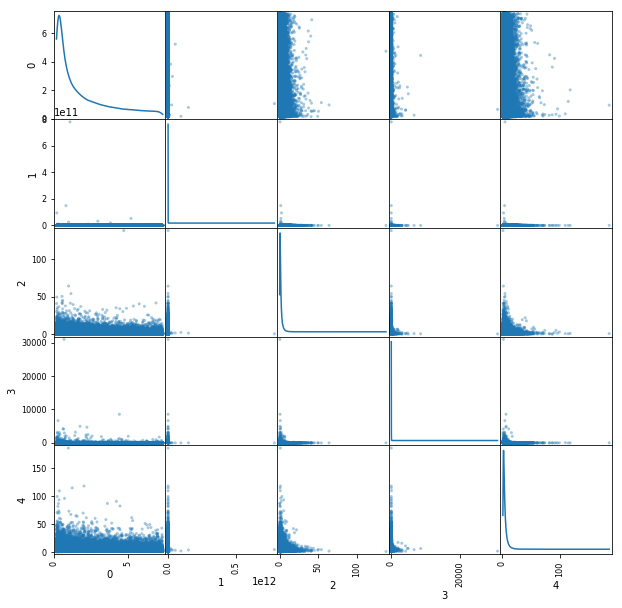

In [4]:
scatter_matrix(distDataFrame.T, alpha=0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

In [7]:
resultsTable(mixtures, negentropyType = 'KDE', n_bins = 100)

C:\Users\Pedro\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1326: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\Pedro\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0.4734,12.8411,0.8137,0
1,16.8286,11.5117,0.0005,0
2,0.7428,35.2891,0.5733,0
3,4.4678,11.5268,0.0114,0
4,0.6323,34.8389,0.6251,0


## NPCA-RLS Algorithm

In [8]:
[yNPCA, WNPCA] = NPCA_RLS(mixtures, runs = 1)

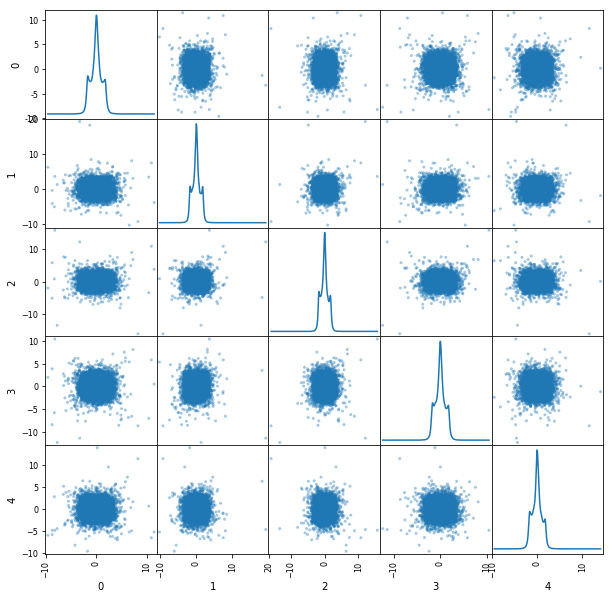

In [9]:
scatter_matrix(pd.DataFrame(yNPCA.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

C:\Users\Pedro\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1326: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0.8219,0.4466,0.9896,0
1,1.0286,1.7878,0.9866,0
2,1.2392,0.7969,0.9873,0
3,0.9197,0.5475,0.99,0
4,0.916,0.95,0.99,0


C:\Users\Pedro\Anaconda3\lib\site-packages\statsmodels\sandbox\distributions\mv_measures.py:47: RuntimeWarning: invalid value encountered in sqrt
  mi_normed = np.sqrt(1. - np.exp(-2 * mi))


KeyboardInterrupt: 

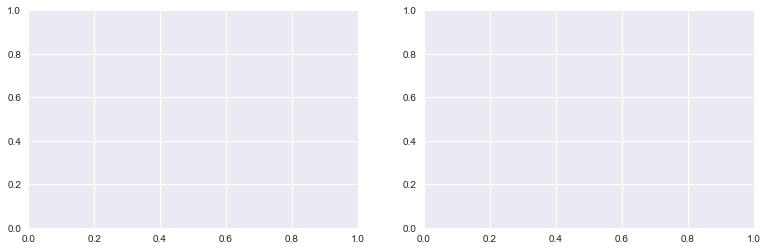

In [11]:
resultsTable(yNPCA)
plot_MutualInformation(mixtures[-1000:], y = yNPCA[-1000:], KDE = True)

## Chichocki-Unbehauen Algorithm Feedback network

In [ ]:
[yFeedback, WFeedback] = cichocki_Feedback(mixtures, runs  = 1) 

In [ ]:
scatter_matrix(pd.DataFrame(yFeedback.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

In [ ]:
resultsTable(yFeedback)
plot_MutualInformation(mixtures[-1000:], y = yFeedback[-1000:], KDE = False)

## Chichocki-Unbehauen Algorithm Feedforward network

In [ ]:
[yFeedforward, WFeedforward] = cichocki_Feedforward(mixtures, learningRate = 1e-11, runs = 1)

In [ ]:
scatter_matrix(pd.DataFrame(yFeedforward.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

In [ ]:
resultsTable(yFeedforward)
plot_MutualInformation(mixtures[-1000:], y = yFeedforward[-1000:], KDE = False)